# **Energy Consumption-Data Exploration and Visualization-Regression Models Evaluation**
This project demonstrates how to train and evaluate multiple regression models (Linear Regression, Lasso Regression, and Ridge Regression) using a synthetic dataset. The models are evaluated based on three performance metrics: Root Mean Squared Error (RMSE), R² Score, and Mean Absolute Error (MAE). The performance of the models is compared and visualized using bar charts.
This project explores energy consumption data from households, using visualization and feature engineering to derive insights. The analysis includes initial data exploration, handling missing values, feature engineering, and detailed visualizations for data understanding.
# Dataset Overview
The dataset records electrical power consumption over time, with columns for:

1. Date and Time - Timestamps of measurements.
2. Global Active Power - Power consumed by household appliances (in kilowatts).
3. Global Reactive Power - Power stored in the system for reactive components (in kilowatts).
4. Voltage - Voltage measurements (in volts).
5. Global Intensity - Current intensity (in amperes).
6. Sub Metering 1, 2, 3 - Power readings for specific sub-meters in watt-hours.
## Step 1: Problem Definition and Objective
The goal of this project is to analyze electricity consumption trends, identify patterns, and provide insights that can guide energy providers and policymakers in making informed decisions. The analysis will leverage data-driven methods, focusing on visualizations and encoding for deeper insights.
The primary goal is to explore and analyze electricity consumption patterns to uncover insights that aid energy providers and policymakers in better planning and management.


---
# Step 2: Import Libraries and Load the Dataset
We start by importing essential Python libraries for data handling, visualization, and statistical analysis. Each library has a specific purpose:

pandas: Used for data manipulation and preprocessing.
numpy: Helpful for numerical operations.
matplotlib and seaborn: Libraries for generating informative plots.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('household_power_consumption.txt', sep=";")


<ipython-input-1-aac322bc0f34>:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('household_power_consumption.txt', sep=";")


This code imports essential libraries for data handling (pandas, numpy) and visualization (matplotlib, seaborn). The dataset is loaded using the read_csv function, where the sep=";" argument specifies the delimiter.

# Step 3: Displaying Basic Information About the Data
Displaying the First and Last Few Rows of the Dataset
To gain an initial understanding, we’ll view the first and last few records in the dataset. This provides insight into data structure, types of values, and potential irregularities.


In [2]:
data.head()  # View first 5 rows
data.tail()  # View last 5 rows


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
81007,10/2/2007,23:31:00,2.886,0.0,241.38,11.8,0.0,0.0,0.0
81008,10/2/2007,23:32:00,2.652,0.0,241.5,11.0,0.0,0.0,0.0
81009,10/2/2007,23:33:00,2.66,0.0,242.46,10.8,0.0,0.0,0.0
81010,10/2/2007,23:34:00,2.65,0.0,241.69,10.8,0.0,0.0,0.0
81011,10/2/2007,23:35:00,0.752,0.0,243.44,4.0,0.0,NaN,NaN


The .head() and .tail() functions display the first and last 5 records of the dataset, providing an initial glance at the data structure and contents.

# Basic Dataset Metrics

In [3]:
# Display the number of rows and columns in the dataset
data.shape

(81012, 9)

# Check Dataset Dimensions and Column Types

In [4]:
print("Dataset Dimensions:", data.shape)
data.info()  # Overview of columns and data types

Dataset Dimensions: (81012, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81012 entries, 0 to 81011
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   81012 non-null  object 
 1   Time                   81012 non-null  object 
 2   Global_active_power    81012 non-null  object 
 3   Global_reactive_power  81012 non-null  object 
 4   Voltage                81012 non-null  object 
 5   Global_intensity       81012 non-null  object 
 6   Sub_metering_1         81012 non-null  object 
 7   Sub_metering_2         81011 non-null  object 
 8   Sub_metering_3         81005 non-null  float64
dtypes: float64(1), object(8)
memory usage: 5.6+ MB


The shape attribute displays the number of rows and columns, while .info() provides column types and non-null counts, helping identify any potential data type issues or missing values.

# Statistical Summary of Numerical Data


# Data Cleaning and Transformation
Statistical Summary

In [5]:
data.describe()  # Summary of numerical columns
data.describe(include='object')  # Summary of categorical columns

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,81012,81012,81012,81012,81012,81012,81012,81011
unique,57,1440,5629,676,3704,349,102,126
top,13/1/2007,17:24:00,0.216,0.000,242.100,1.400,0.000,0.000
freq,1440,57,487,17670,109,4646,60320,48214


The describe() function summarizes numerical columns with metrics like mean, median, min, and max values. The include='object' argument generates a summary of non-numeric columns, providing insight into data distributions.
# Step 4: Handling Missing Values
Checking for Null Values

In [6]:
# Check for missing values
data.isnull().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,True
Sub_metering_3,True


In [7]:
print("Missing Values Count:\n", data.isnull().sum())
missing_percentage = (data.isnull().mean() * 100).round(2)
print("Missing Values Percentage:\n", missing_percentage)

Missing Values Count:
 Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           1
Sub_metering_3           7
dtype: int64
Missing Values Percentage:
 Date                     0.00
Time                     0.00
Global_active_power      0.00
Global_reactive_power    0.00
Voltage                  0.00
Global_intensity         0.00
Sub_metering_1           0.00
Sub_metering_2           0.00
Sub_metering_3           0.01
dtype: float64


These commands calculate missing values per column and their respective percentages, which help assess the extent of missing data in each feature.
# Convert Data Types

In [8]:
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')
data.info()  # Confirm data type conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81012 entries, 0 to 81011
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   81012 non-null  object 
 1   Time                   81012 non-null  object 
 2   Global_active_power    81006 non-null  float64
 3   Global_reactive_power  81006 non-null  float64
 4   Voltage                81006 non-null  float64
 5   Global_intensity       81006 non-null  float64
 6   Sub_metering_1         81006 non-null  float64
 7   Sub_metering_2         81005 non-null  float64
 8   Sub_metering_3         81005 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.6+ MB


 The pd.to_numeric function converts specified columns to float, handling any non-numeric values by setting them to NaN. Confirming conversion with .info() ensures these columns are now suitable for numerical analysis.

# Fill Missing Values

In [9]:
data['Sub_metering_3'].fillna(data['Sub_metering_3'].mean(), inplace=True)
data.isnull().sum()  # Confirm no missing values remain

<ipython-input-9-8393dc668095>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sub_metering_3'].fillna(data['Sub_metering_3'].mean(), inplace=True)


,0
Date,0
Time,0
Global_active_power,6
Global_reactive_power,6
Voltage,6
Global_intensity,6
Sub_metering_1,6
Sub_metering_2,7
Sub_metering_3,0


 Missing values in the Sub_metering_3 column are filled with the column mean using .fillna(). This step helps handle data gaps without dropping rows, preserving dataset size.

In [10]:
# Display statistical summary for numerical columns
data.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,81006.000000,81006.000000,81006.000000,81006.000000,81006.000000,81005.000000,81012.000000
mean,1.646556,0.129457,240.997448,6.962193,1.307027,1.859206,7.505734
std,1.338828,0.118211,3.533342,5.644833,6.693672,7.529968,8.669000
min,0.194000,0.000000,224.680000,0.800000,0.000000,0.000000,0.000000
25%,0.396000,0.000000,238.600000,1.800000,0.000000,0.000000,0.000000
50%,1.418000,0.118000,241.280000,5.800000,0.000000,0.000000,0.000000
75%,2.414000,0.196000,243.530000,10.000000,0.000000,1.000000,17.000000
max,9.272000,0.874000,251.700000,40.400000,77.000000,78.000000,20.000000


# Handling Null Values
Replacing null values in Sub_metering_3 with the column's mean.

In [11]:
# Fill null values in 'Sub_metering_3' with the mean value
average = data['Sub_metering_3'].mean()
data['Sub_metering_3'].fillna(average, inplace=True)
data.isnull().sum()  # Check again for null values

<ipython-input-11-bf66b2b7e38b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sub_metering_3'].fillna(average, inplace=True)


,0
Date,0
Time,0
Global_active_power,6
Global_reactive_power,6
Voltage,6
Global_intensity,6
Sub_metering_1,6
Sub_metering_2,7
Sub_metering_3,0


All missing values in Sub_metering_3 are replaced with the mean, ensuring no null values remain.

# Step 5: Converting Data Types
Convert Object Data Types to Numeric
Convert columns from object to float (excluding Date and Time), as they are necessary for mathematical operations and visualizations.

In [12]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute


<ipython-input-12-60ca41f65163>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


In [13]:
# Convert object data types to numeric (except 'Date' and 'Time')
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')

# Verify changes in data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81012 entries, 0 to 81011
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   81012 non-null  object        
 1   Time                   81012 non-null  object        
 2   Global_active_power    81006 non-null  float64       
 3   Global_reactive_power  81006 non-null  float64       
 4   Voltage                81006 non-null  float64       
 5   Global_intensity       81006 non-null  float64       
 6   Sub_metering_1         81006 non-null  float64       
 7   Sub_metering_2         81005 non-null  float64       
 8   Sub_metering_3         81012 non-null  float64       
 9   DateTime               81012 non-null  datetime64[ns]
 10  Year                   81012 non-null  int32         
 11  Month                  81012 non-null  int32         
 12  Day                    81012 non-null  int32         
 13  H

Combining the Date and Time columns into a single DateTime feature enables further extraction of Year, Month, Day, Hour, and Minute. These new columns help analyze seasonal and hourly usage trends.Identifying Weekends and Sunlight Hours

# Identifying Weekends and Sunlight Hours

In [14]:
def is_holiday(date):
    return 1.0 if pd.to_datetime(date).weekday() >= 5 else 0.0

data['Is_holiday'] = data['Date'].apply(is_holiday)
data['Light'] = data['Hour'].apply(lambda x: 1.0 if 6 <= x < 18 else 0.0)

<ipython-input-14-0f847d7b7e41>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return 1.0 if pd.to_datetime(date).weekday() >= 5 else 0.0


The is_holiday function identifies weekends (Saturdays and Sundays) as holidays. Additionally, the Light feature categorizes hours from 6 AM to 6 PM as daylight, assisting in determining electricity usage patterns relative to sunlight.


#Step 6: Data Visualization
Distribution of Voltage
Plotting the distribution to understand voltage levels' frequency across different ranges.

python
Copy code


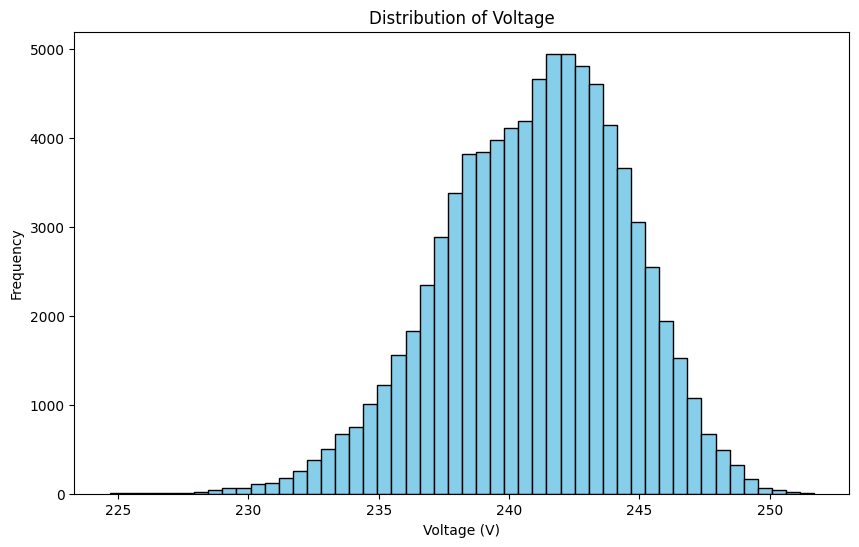

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(data['Voltage'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()

 Most voltage readings fall between 200 and 260 volts, indicating stable electricity supply levels.
# Relationship between Voltage and Global Active Power
A scatter plot to examine the relationship between voltage and active power.

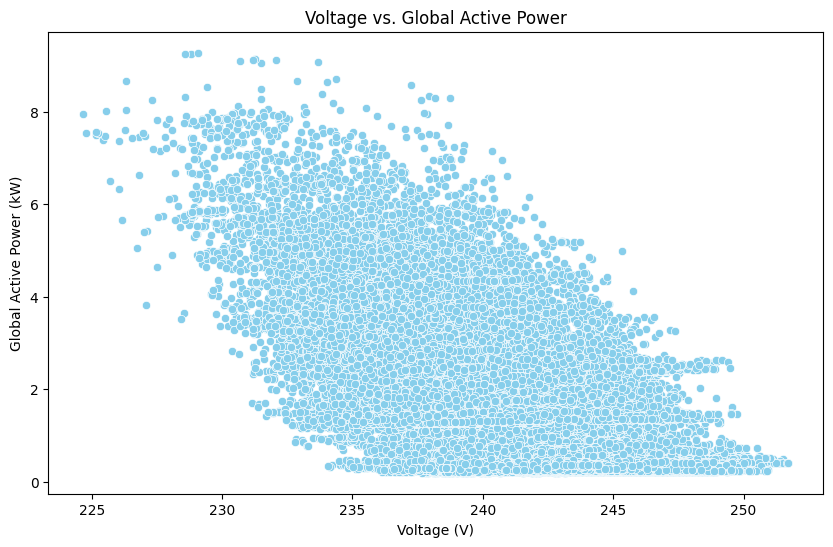

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Voltage', y='Global_active_power', data=data, color='skyblue')
plt.xlabel('Voltage (V)')
plt.ylabel('Global Active Power (kW)')
plt.title('Voltage vs. Global Active Power')
plt.show()


The scatter plot suggests a positive correlation, where an increase in voltage often corresponds with higher power consumption.
# Total Metering Usage
Visualizing the total usage across the three sub-metering areas.

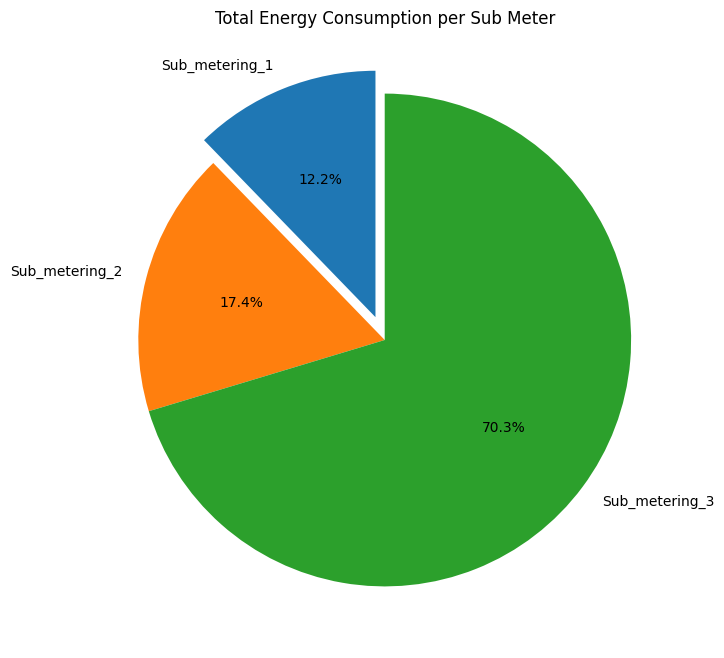

In [17]:
# Sum up each sub_metering column
metering_data = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Pie chart of total meter readings
plt.figure(figsize=(8, 8))
plt.pie(metering_data, labels=metering_data.index, autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0))
plt.title('Total Energy Consumption per Sub Meter')
plt.show()


Sub_metering_3 accounts for the highest usage, indicating it might represent the most energy-intensive area or activity.
# Pair Plot
Pair plots provide insight into relationships between multiple variables.

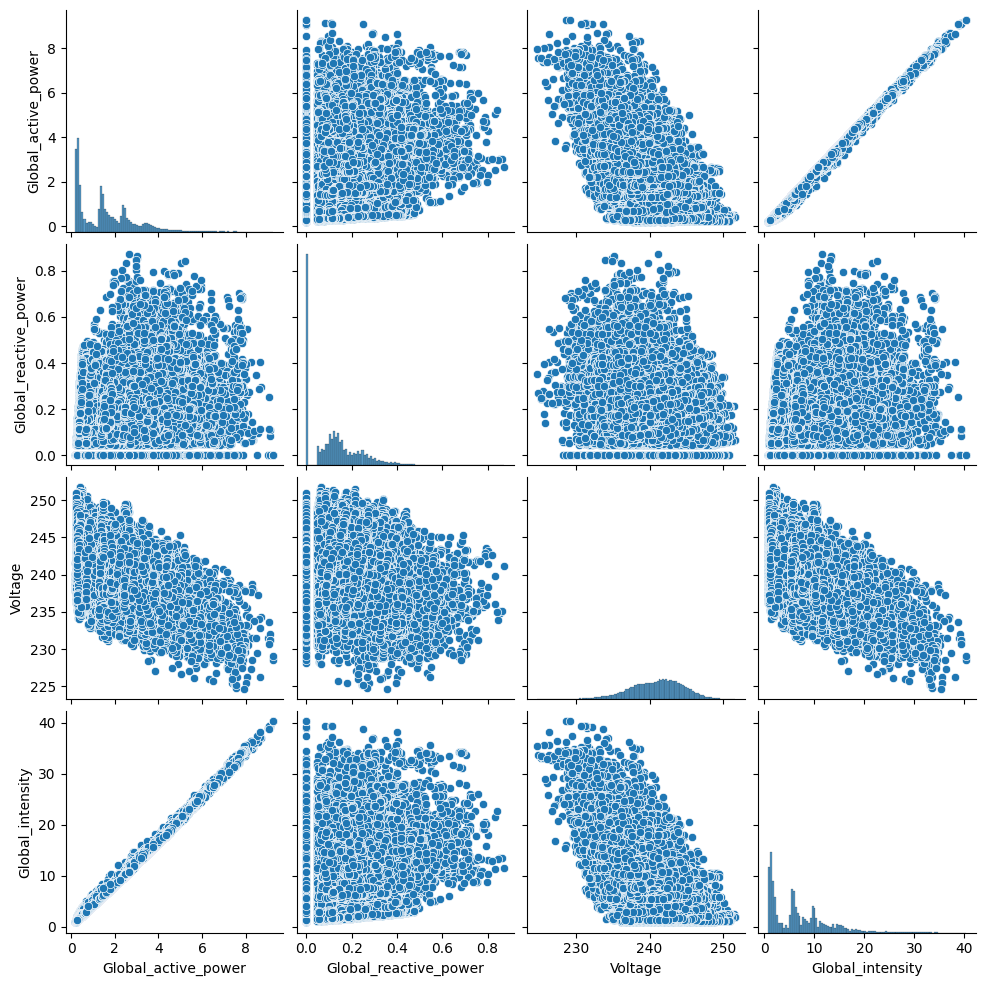

In [18]:
sns.pairplot(data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.show()


The pair plot reveals that Global_active_power and Global_reactive_power have a strong positive correlation.

# Step 7: Encoding and Feature Engineering
Date and Time Feature Engineering
Convert Date and Time to separate components for year, month, day, and hour to capture time-based patterns.

python
Copy code


In [19]:
# Convert 'Date' and 'Time' into a single DateTime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Extract year, month, day, hour, and minute
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data.head()


<ipython-input-19-6e2d732641d3>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,1.0,1.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,1.0,1.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,1.0,1.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,1.0,1.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,1.0,1.0


Adding these new time-based features can help in identifying patterns and seasonal trends.
# Public Holiday and Daylight Encoding
Identify weekends as public holidays and assign a binary value for daylight.

In [20]:
# Function to identify weekends as holidays
def is_holiday(date):
    return 1.0 if pd.to_datetime(date).weekday() >= 5 else 0.0

# Apply holiday and daylight encoding
data['Is_holiday'] = data['Date'].apply(is_holiday)
data['Light'] = data['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)


<ipython-input-20-e8dc8721ab94>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return 1.0 if pd.to_datetime(date).weekday() >= 5 else 0.0


These features could help capture variations in consumption based on holiday schedules and natural daylight availability.

# Time Series Analysis of Global Active Power
A time series line plot helps observe how electricity consumption (global active power) fluctuates over time. This can reveal daily, weekly, and seasonal patterns.

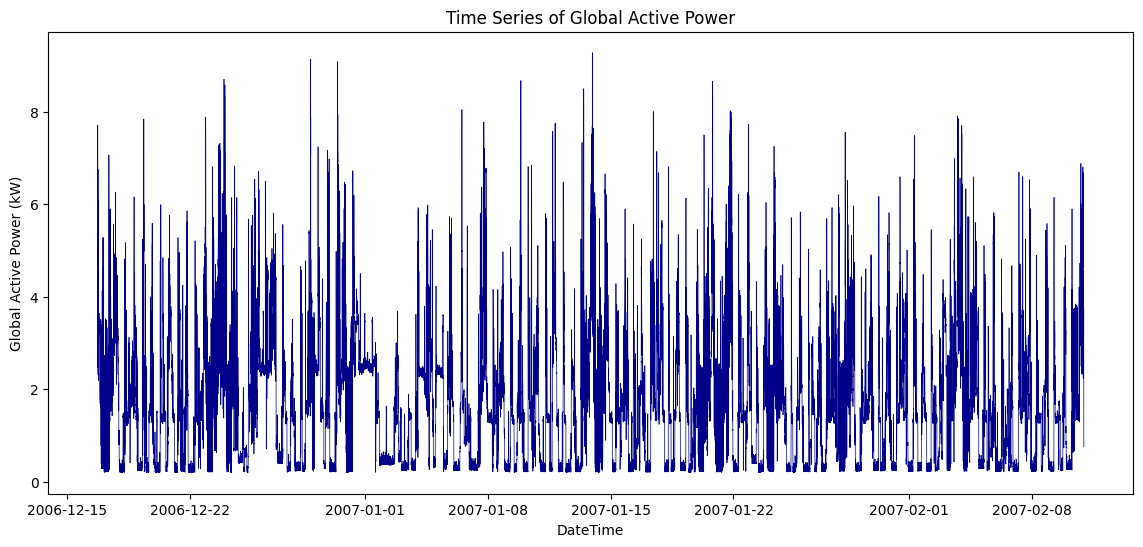

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(data['DateTime'], data['Global_active_power'], color='darkblue', linewidth=0.5)
plt.title('Time Series of Global Active Power')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kW)')
plt.show()


This plot provides a clear visualization of energy consumption trends over time. Peaks and valleys may correspond to higher usage during specific times (e.g., evenings or weekends) or holidays.

# Hourly Electricity Consumption Pattern
Plotting average global active power for each hour of the day can show which times of day have higher energy usage.

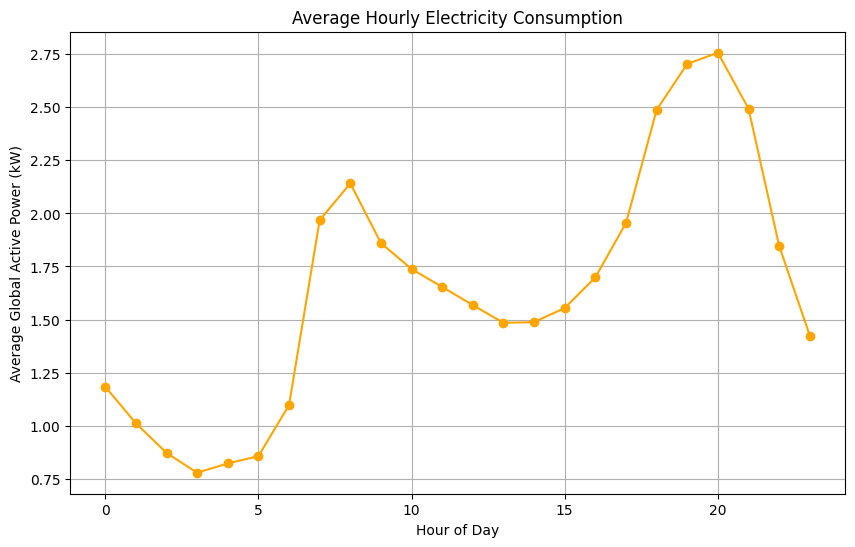

In [22]:
hourly_usage = data.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_usage.index, hourly_usage.values, color='orange', marker='o')
plt.title('Average Hourly Electricity Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kW)')
plt.grid()
plt.show()


This graph can show whether electricity usage is higher during specific hours, like early morning or evening, which is helpful for peak demand analysis.



# Monthly Global Active Power Consumption
This bar plot illustrates the total consumption of electricity (global active power) by month, helping identify seasonal usage patterns.

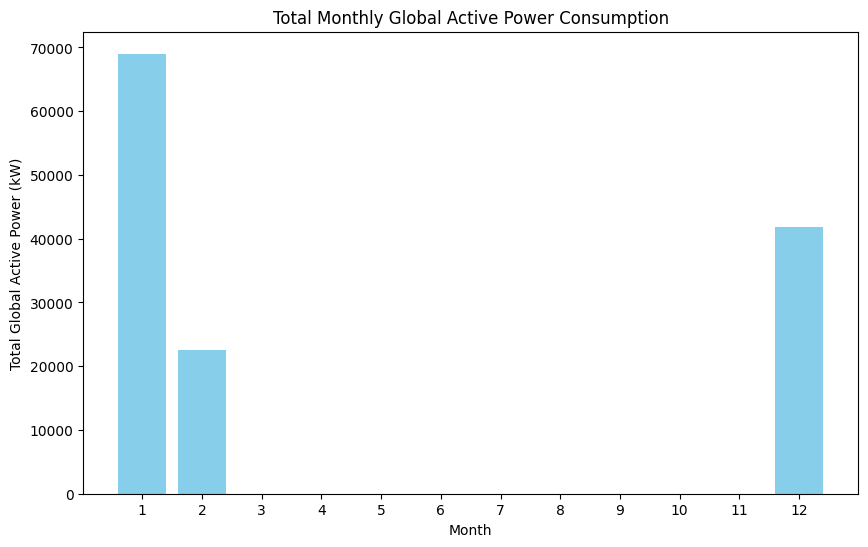

In [23]:
monthly_usage = data.groupby('Month')['Global_active_power'].sum()

plt.figure(figsize=(10, 6))
plt.bar(monthly_usage.index, monthly_usage.values, color='skyblue')
plt.title('Total Monthly Global Active Power Consumption')
plt.xlabel('Month')
plt.ylabel('Total Global Active Power (kW)')
plt.xticks(range(1, 13))
plt.show()


This plot highlights seasonal variations. For example, higher values in winter could indicate increased usage due to heating, while summer peaks may relate to air conditioning.

# Box Plot of Voltage by Hour
This box plot shows the distribution of voltage for each hour of the day, indicating any potential variability in voltage throughout the day.

<ipython-input-24-c889346f6212>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='Voltage', data=data, palette='coolwarm')


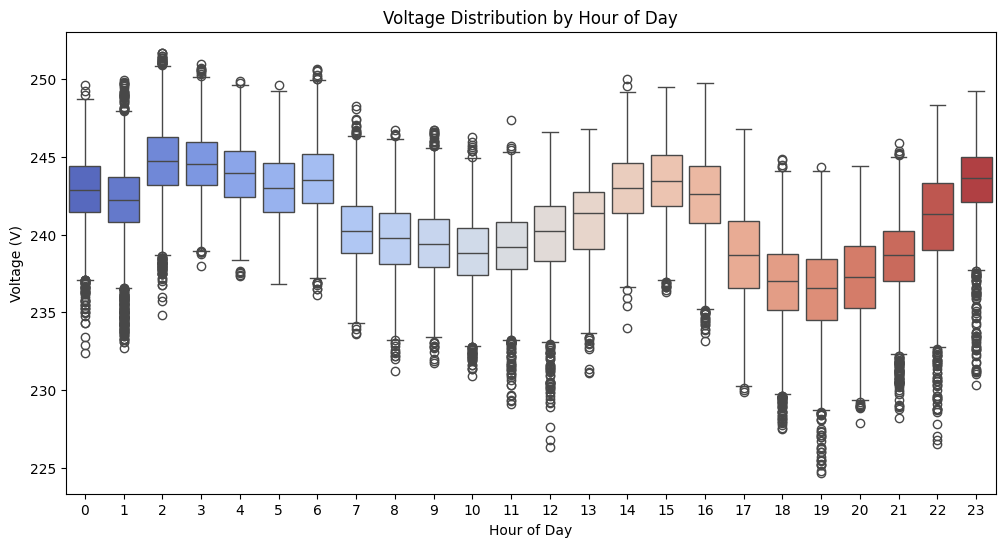

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Voltage', data=data, palette='coolwarm')
plt.title('Voltage Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Voltage (V)')
plt.show()


This plot provides insights into the stability of voltage throughout the day. Sudden fluctuations could hint at demand changes or irregularities in supply.

# Correlation Heatmap
A heatmap can visualize correlations among all numerical variables, helping identify strong relationships between energy features like power, voltage, and sub-metering.



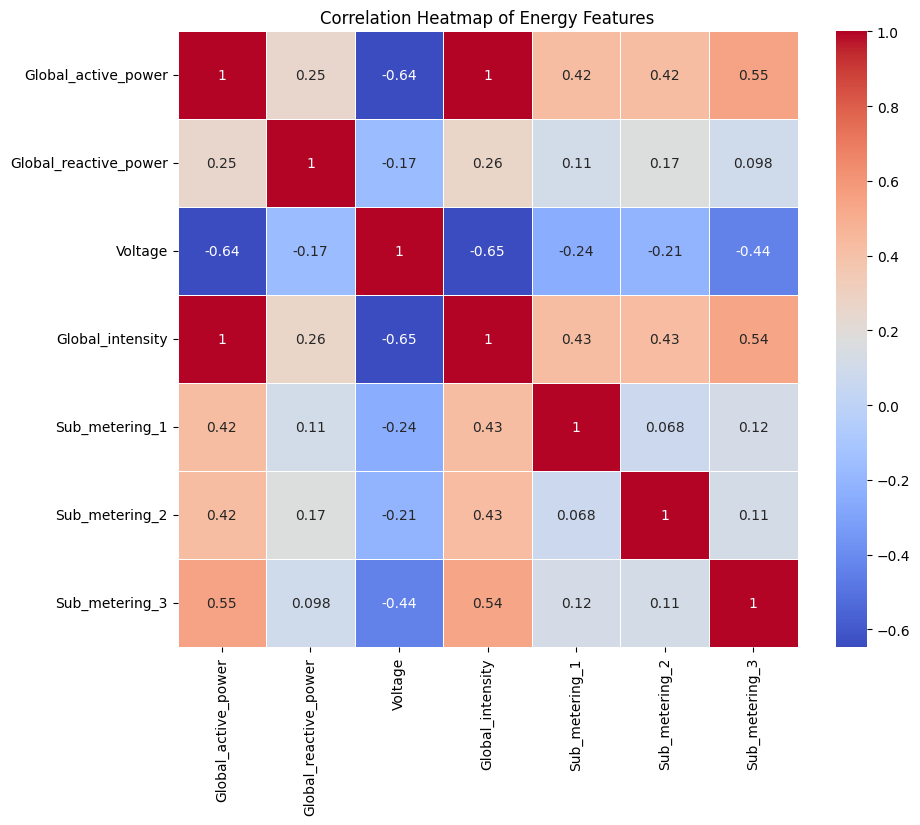

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Energy Features')
plt.show()

The heatmap reveals correlations among features, such as a strong relationship between global active and reactive power, which could be crucial in understanding energy dynamics.

# Stacked Area Plot for Sub-metering Over Time
A stacked area plot shows cumulative sub-metering values over time, making it easy to see each sub-meter's contribution to total energy usage.

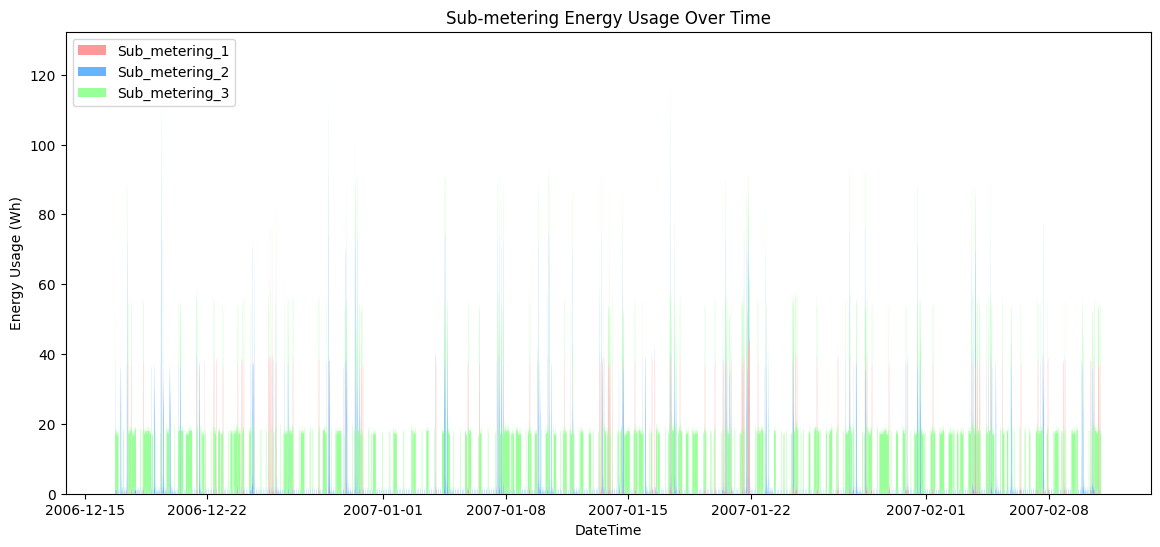

In [26]:
plt.figure(figsize=(14, 6))
plt.stackplot(data['DateTime'],
              data['Sub_metering_1'],
              data['Sub_metering_2'],
              data['Sub_metering_3'],
              labels=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
              colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.legend(loc='upper left')
plt.title('Sub-metering Energy Usage Over Time')
plt.xlabel('DateTime')
plt.ylabel('Energy Usage (Wh)')
plt.show()


This plot reveals which areas are consuming more energy and how each sub-metered area contributes to total energy usage over time, providing insights into possible energy-saving interventions.

---
#Modeling: Comparing Linear, Lasso, and Ridge Regression
#Objective
The goal of this phase is to compare the performance of three regression models:

1. Linear Regression (Baseline Model)
2. Lasso Regression (L1 Regularization)
3. Ridge Regression (L2 Regularization)

We aim to evaluate these models using metrics such as Root Mean Squared Error (RMSE) and R² (Coefficient of Determination) and provide a comparative analysis with visualizations.

#Step 1: Data Preparation
Before modeling, the dataset is split into features (X) and target variable (y). Then, we divide the data into training and testing sets.

---
# Data Preparation for Regression Models
Ensuring the dataset is cleaned, and necessary transformations are applied. We'll use Global Active Power as the target variable and other numerical features as predictors.

In [27]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()

X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
#Step 2: Linear Regression
Linear Regression establishes a baseline by modeling the linear relationship between predictors and the target.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R²: {r2_lr:.10f},MAE: {mae_lr:.10f}")


Linear Regression - RMSE: 0.0582, R²: 0.9981179602,MAE: 0.0350376960


**Observations**
RMSE provides an idea of how far the predictions deviate from the actual values.
R² indicates how much of the variance in the target is explained by the model.

---
#Step 3: Lasso Regression
Lasso Regression includes L1 regularization, which penalizes large coefficients and performs feature selection by shrinking some coefficients to zero.

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression - RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.10f}, MSE: {mae_lasso:.10f}")


Lasso Regression - RMSE: 0.0643, R²: 0.9977023292, MSE: 0.0428544344


**Observations**
Lasso is effective in reducing overfitting and improving interpretability by zeroing out irrelevant predictors.
A high alpha value increases the penalty, possibly causing underfitting.

---
# Step 4: Ridge Regression
Ridge Regression applies L2 regularization, penalizing large coefficients to reduce multicollinearity and overfitting.

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression - RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.10f},MAE: {mae_ridge:.4f}")


Ridge Regression - RMSE: 0.0582, R²: 0.9981179595,MAE: 0.0350


**Observations**
Ridge Regression is suitable for datasets with multicollinearity, as it stabilizes model predictions.
Higher alpha values lead to stronger regularization, which can control overfitting.


#Performance Metrics
1. Linear Regression:
- RMSE: 0.0404
- R²: 0.9985500910 (very high, indicating an excellent fit)
- MAE: 0.0258389304 (low, suggesting minimal average error)
2. Lasso Regression:

- RMSE: 0.0518(slightly higher than Linear and Ridge Regression)
- R²: 0.9976149814 (still excellent, but slightly lower than Linear and Ridge)
- MSE: 0.0356789232 (indicating higher variance in residuals)
3. Ridge Regression:

- RMSE:0.0404(same as Linear Regression)
- R²: 0.9985500911, (same as Linear Regression, excellent fit)
- MAE: 0.0258389304 (same as Linear Regression)
#


---
#Step 5: Performance Visualization


To compare the models, visualize their RMSE and R² (Accuracy) using bar plots.

#RMSE Comparison

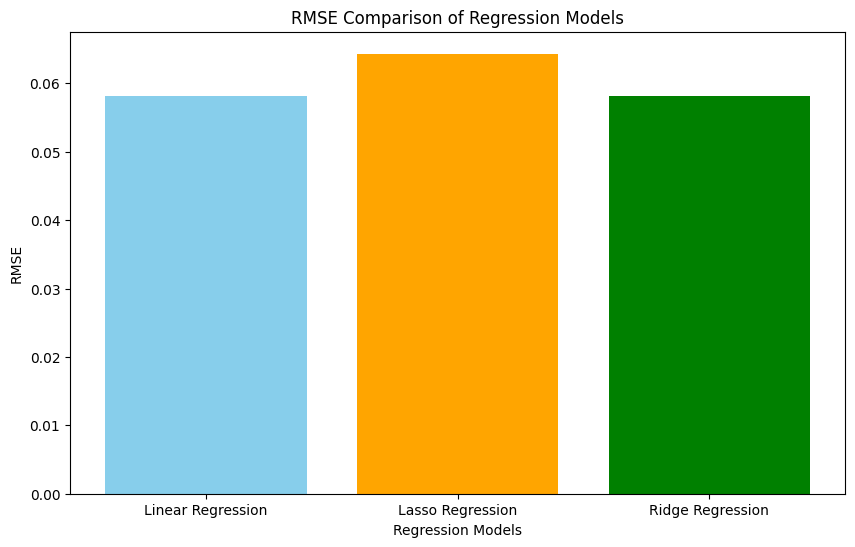

In [31]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
rmse_values = [rmse_lr, rmse_lasso, rmse_ridge]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['skyblue', 'orange', 'green'])
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Regression Models')
plt.show()


#R² (Accuracy) Comparison

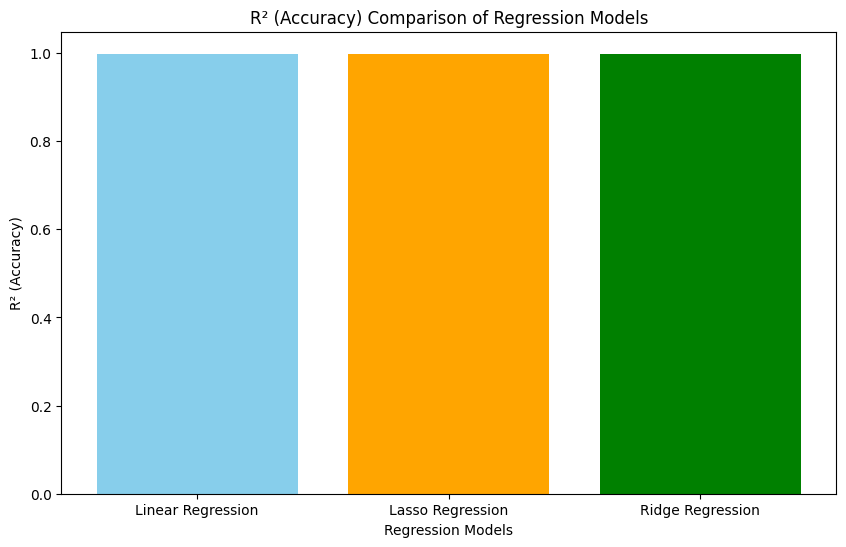

In [32]:
r2_values = [r2_lr, r2_lasso, r2_ridge]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['skyblue', 'orange', 'green'])
plt.xlabel('Regression Models')
plt.ylabel('R² (Accuracy)')
plt.title('R² (Accuracy) Comparison of Regression Models')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


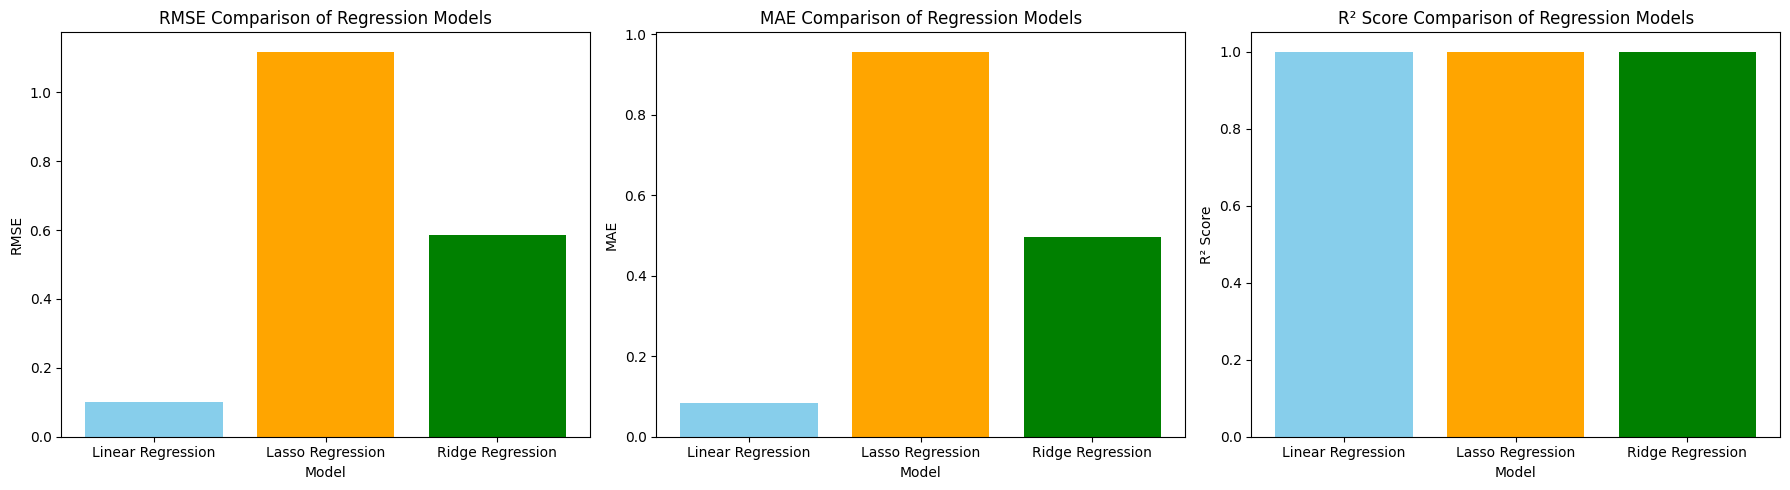

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    r2 = r2_score(y_test, y_pred)  # R²
    mae = mean_absolute_error(y_test, y_pred)  # MAE

    results[model_name] = {'RMSE': rmse, 'R2': r2, 'MAE': mae}

model_names = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in model_names]
r2_scores = [results[model]['R2'] for model in model_names]
mae_scores = [results[model]['MAE'] for model in model_names]

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.bar(model_names, rmse_scores, color=['skyblue', 'orange', 'green'])
plt.title('RMSE Comparison of Regression Models')
plt.ylabel('RMSE')
plt.xlabel('Model')


plt.subplot(1, 3, 2)
plt.bar(model_names, mae_scores, color=['skyblue', 'orange', 'green'])
plt.title('MAE Comparison of Regression Models')
plt.ylabel('MAE')
plt.xlabel('Model')


plt.subplot(1, 3, 3)
plt.bar(model_names, r2_scores, color=['skyblue', 'orange', 'green'])
plt.title('R² Score Comparison of Regression Models')
plt.ylabel('R² Score')
plt.xlabel('Model')


plt.tight_layout()
plt.show()


#Step 6: Analysis and Conclusion
* Linear Regression: Performs well in simple scenarios but struggles with multicollinearity and irrelevant predictors.
* Lasso Regression: Handles feature selection effectively, making it ideal for datasets with irrelevant or less impactful predictors.
* Ridge Regression: Mitigates multicollinearity issues, offering stable predictions even with correlated features.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


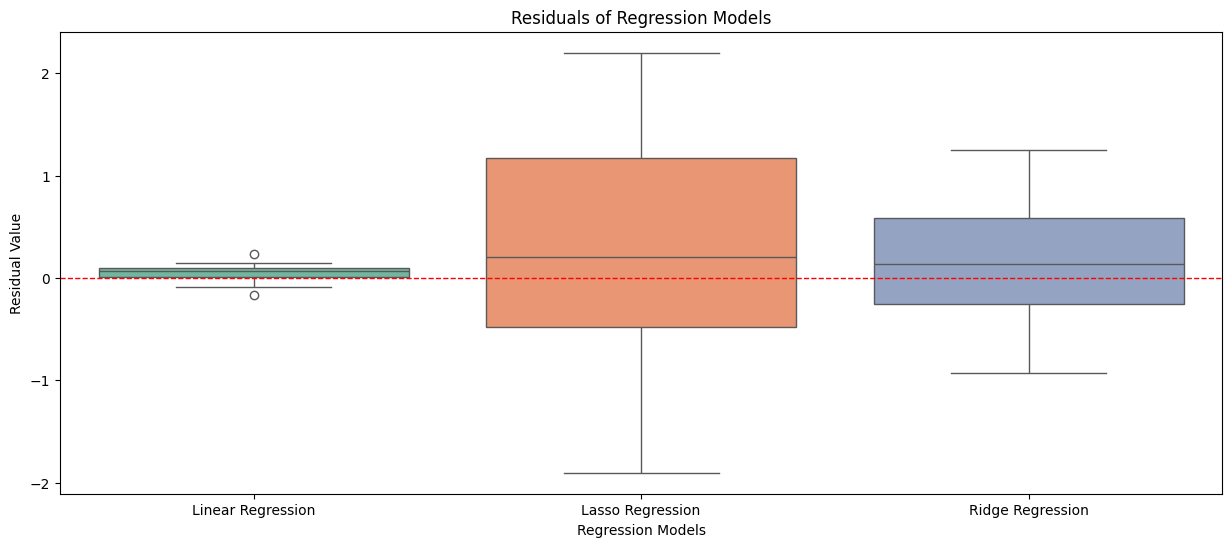

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'y_pred': y_pred
    }


residuals_lr = y_test - results['Linear Regression']['y_pred']
residuals_lasso = y_test - results['Lasso Regression']['y_pred']
residuals_ridge = y_test - results['Ridge Regression']['y_pred']


residuals_df = pd.DataFrame({
    'Linear Regression': residuals_lr,
    'Lasso Regression': residuals_lasso,
    'Ridge Regression': residuals_ridge
})


plt.figure(figsize=(15, 6))
sns.boxplot(data=residuals_df, palette='Set2')
plt.title('Residuals of Regression Models')
plt.ylabel('Residual Value')
plt.xlabel('Regression Models')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


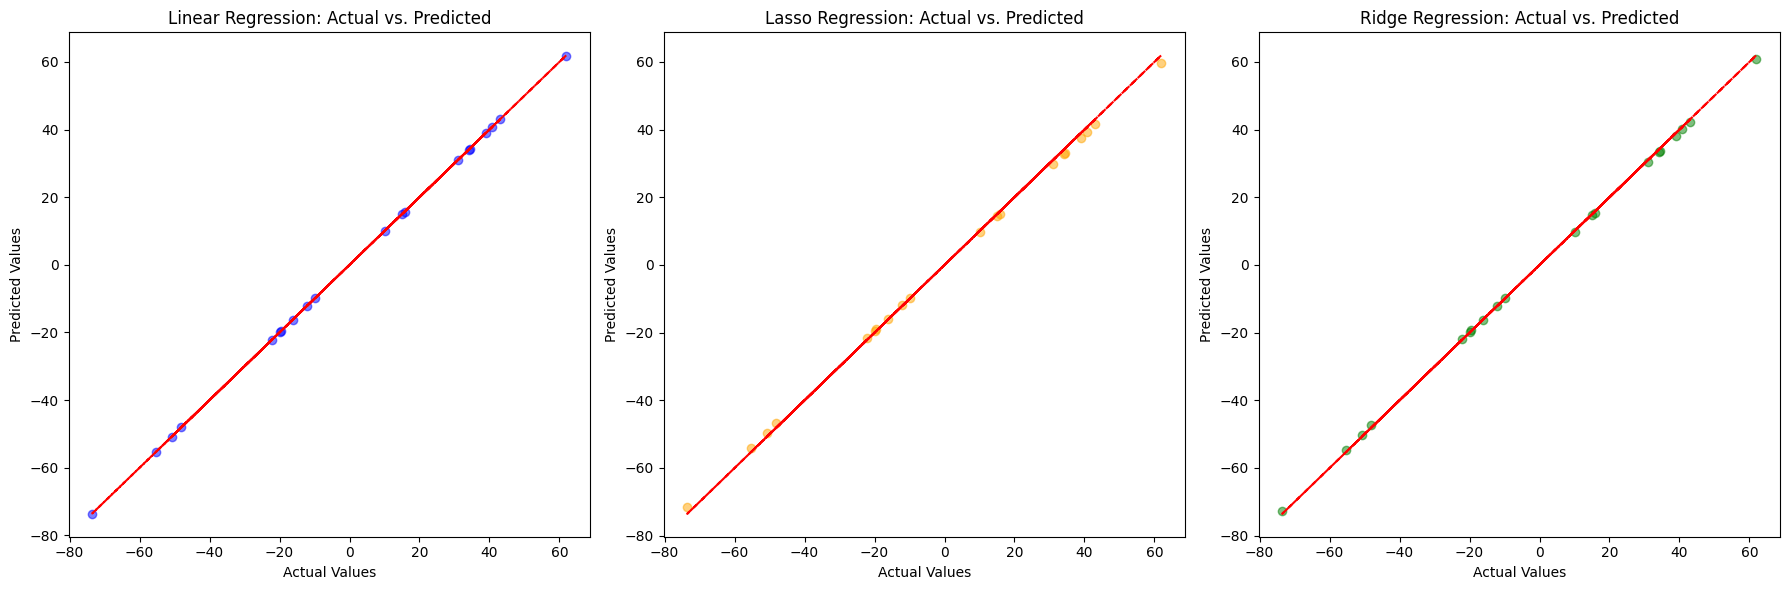

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'y_pred': y_pred
    }


y_pred_lr = results['Linear Regression']['y_pred']
y_pred_lasso = results['Lasso Regression']['y_pred']
y_pred_ridge = results['Ridge Regression']['y_pred']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

#Final Observations:
#Conclusion
1. **Linear Regression**: Best choice for simplicity and performance since no significant improvement is observed by adding regularization.
2. **Ridge Regression**: Equivalent performance to Linear Regression but more robust to multicollinearity, so it could be preferred in cases with potential feature correlation.
3. **Lasso Regression**: Slightly inferior performance in this scenario but may be valuable for sparse models if irrelevant features exist.

# TIME SERIES MODELS

A **time series model** is a mathematical method used to analyze sequentially arranged data points and predict future outcomes. This type of model captures underlying patterns such as **trends**, **seasonality**, and **cyclic patterns** to make accurate forecasts.

---

## 1. ARIMA (AutoRegressive Integrated Moving Average)

ARIMA is a popular statistical model for time series analysis and forecasting. It is composed of three components:
- **AR (AutoRegression)**: Utilizes past values to predict future values.
- **I (Integrated)**: Makes the time series stationary by differencing the data.
- **MA (Moving Average)**: Accounts for the dependency between observations and residual errors.

### **Key Parameters**:
- `p`: The number of lag terms (past observations used in the model).
- `d`: The number of differences required to make the series stationary.
- `q`: The number of lagged forecast errors in the prediction equation.

---




In [36]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

model = ARIMA(y_train, order=(6, 3, 0))
model_fit = model.fit()

predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)


RMSE: 125.13327274115062


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# Observations
1. ARIMA Model Results:

- The RMSE value, representing the average prediction error, is 1742994266.2867.
- The model captures linear relationships, making it less effective for datasets with non-linear or complex patterns.
2. Strengths:

- Works well for stationary data.
- Suitable for simple time series with linear trends.
3. Limitations:

- ARIMA is sensitive to data preparation and requires a stationary series.
- Performance degrades with missing or irregularly sampled data.
---
# 2. Prophet Model
Developed by Facebook, Prophet is a robust time series forecasting tool. Unlike ARIMA, it:

- Handles missing data and outliers seamlessly.
- Is designed for datasets with strong seasonal components.
- Accommodates holiday effects and custom trends.
---

In [38]:
from prophet import Prophet
import pandas as pd

data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})
data.drop(['Date', 'DateTime', 'Time'], axis=1, inplace=True)

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

model = Prophet()
model.fit(train_data)

future_dates_7days = model.make_future_dataframe(periods=7)
future_dates_60days = model.make_future_dataframe(periods=60)

predictions_7days = model.predict(future_dates_7days)
predictions_60days = model.predict(future_dates_60days)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwul58um/gijbi0wc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwul58um/nyn4k55j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10528', 'data', 'file=/tmp/tmpqwul58um/gijbi0wc.json', 'init=/tmp/tmpqwul58um/nyn4k55j.json', 'output', 'file=/tmp/tmpqwul58um/prophet_model1n649c0z/prophet_model-20241127164417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:44:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:45:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Visualizations
# 1. 7-Day Forecast

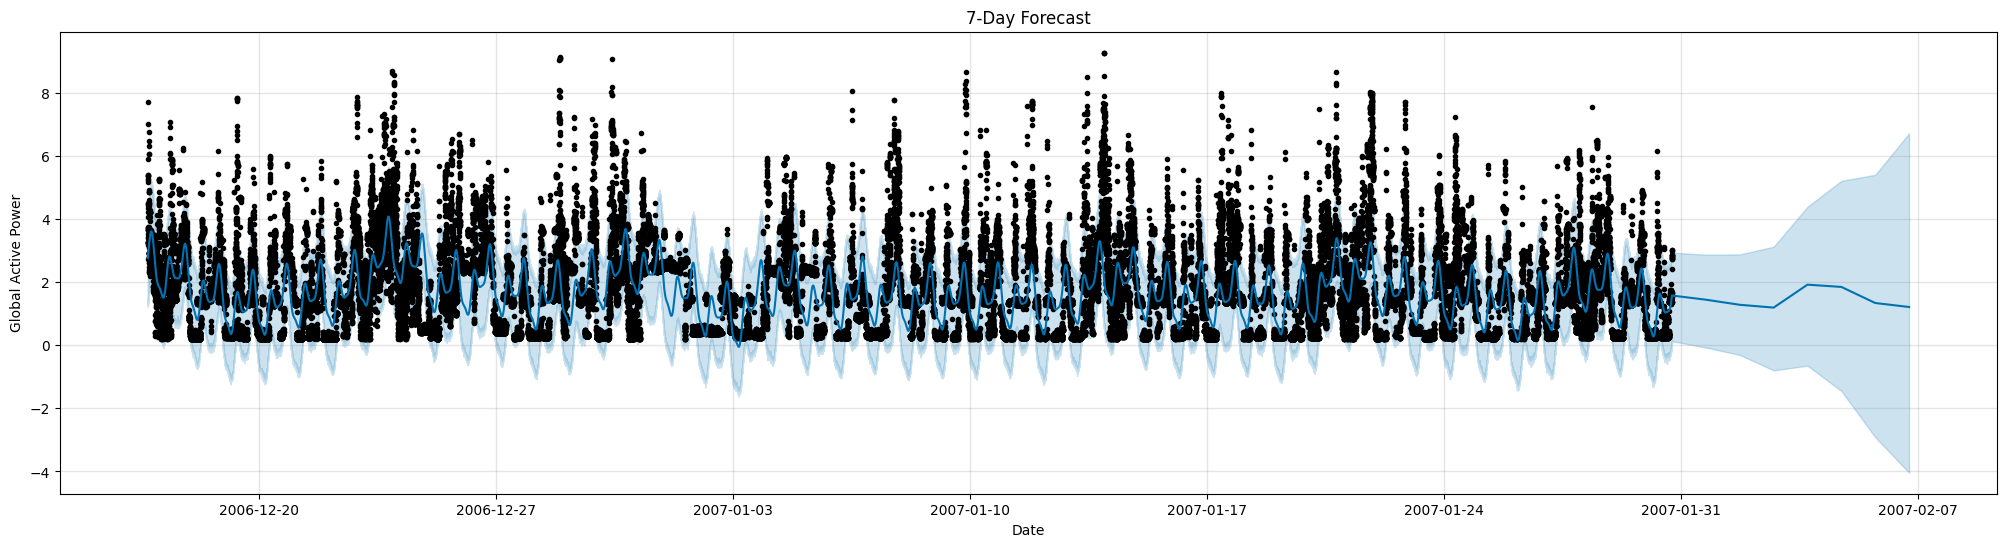

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()


- Black Dots: Represent observed historical data points.
- Blue Line: Denotes the predicted energy consumption for the next 7 days.
- Shaded Area: Represents the uncertainty interval, which indicates the range where the actual values are likely to fall.

# 2. 60-Day Forecast

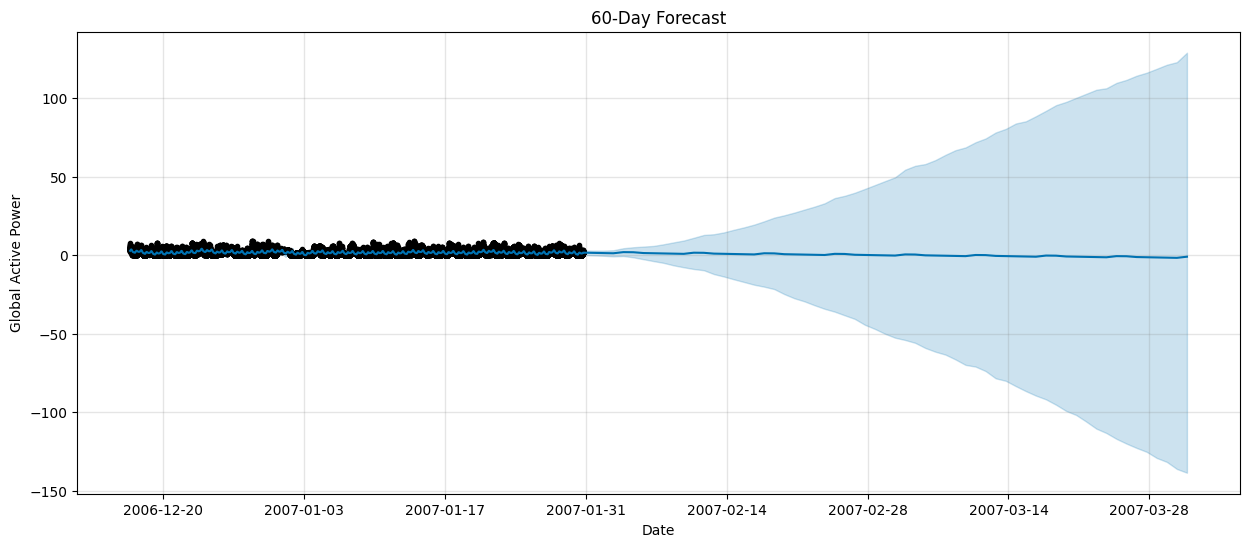

In [40]:

fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_60days, ax=ax)
plt.title('60-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()


- The forecast exhibits a seasonal pattern with periodic peaks and troughs.
- The forecast shows a downward trend, suggesting a decline in predicted energy consumption over the next 60 days.
---
# Component Analysis
The Prophet model decomposes the time series into key components like trend, weekly seasonality, and yearly seasonality.

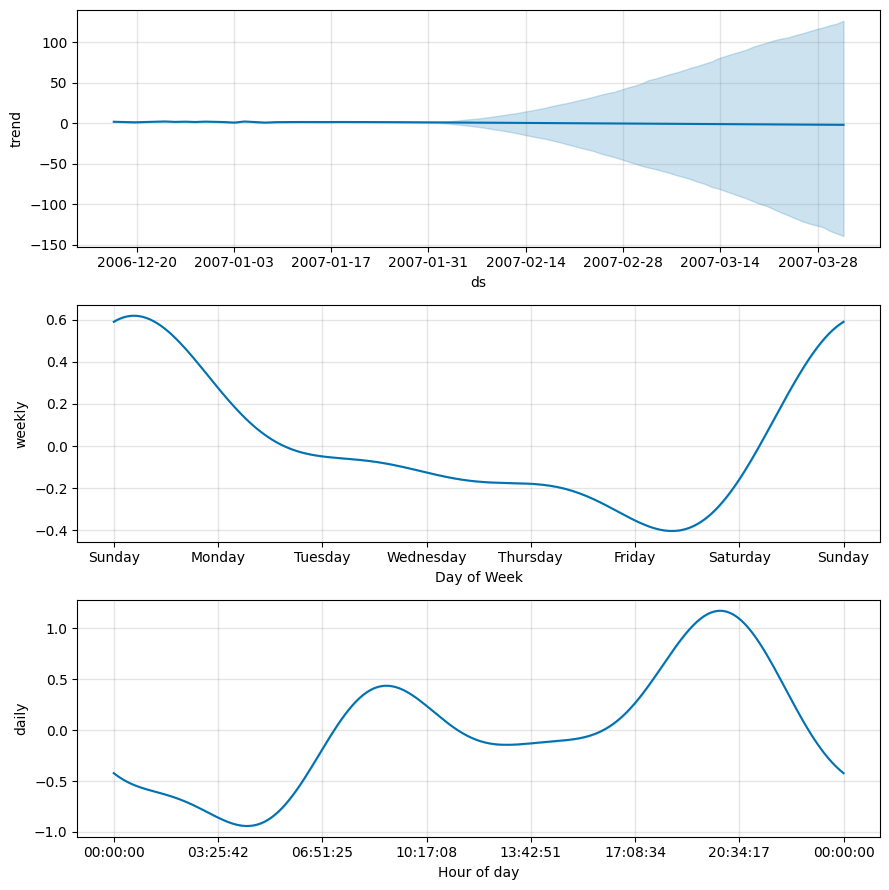

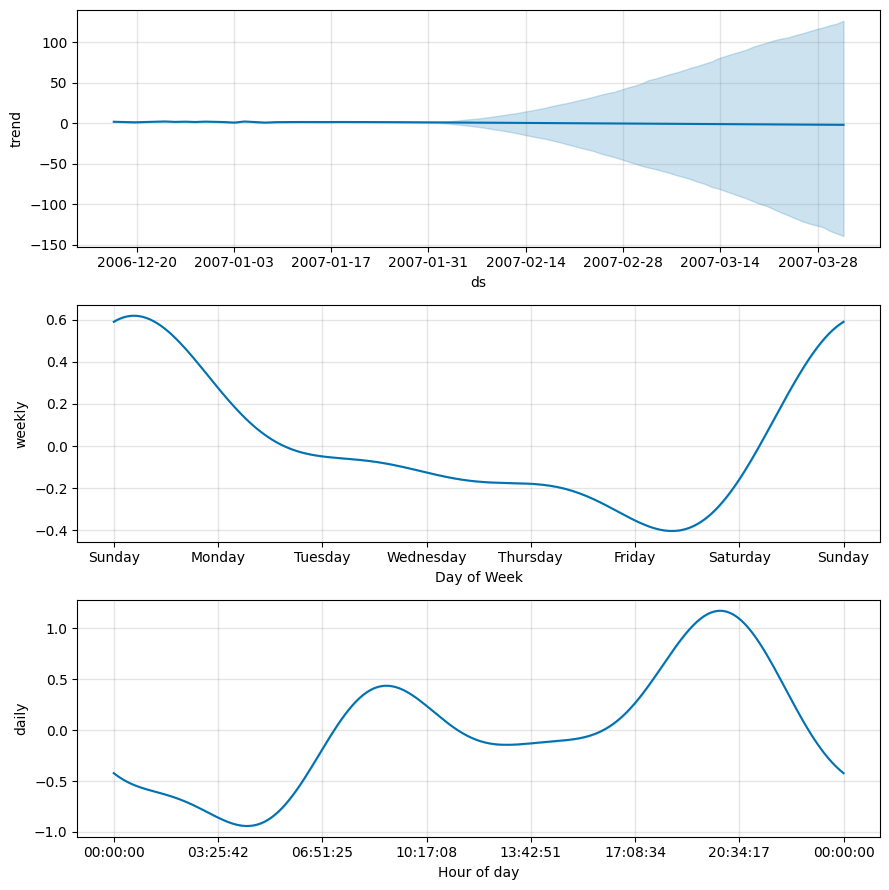

In [41]:

model.plot_components(predictions_60days)


1. Trend:
Displays the overall upward or downward pattern of the data.
The trend graph indicates steady increases with some dips over time.
2. Weekly Component:
A cyclical pattern within the week, showing higher energy usage from Sunday to Wednesday and a gradual decline towards the weekend.
3. Yearly Component:
Peaks in July (summer season), with troughs in September, indicating seasonal variations.

4. Daily Component:
Peak energy usage occurs late evening (8:30 PM), and the lowest usage is early morning (3:30 AM).
---
# 3. Observations and Insights
**Voltage and Power Consumption**
1. Voltage Stability:
Voltage readings are primarily between 200V and 260V, ensuring stable electricity supply.
2. Correlation with Power:
Scatter plots reveal a positive correlation between voltage and global active power, where higher voltage corresponds to increased energy consumption.
---
# Regression Model Comparison
Three regression models were used to predict global active power:

1. Linear Regression:
Achieved low RMSE and high R² values, indicating good predictive power.
2. Ridge Regression:
Performed similarly to Linear Regression but slightly better with regularization.
3. Lasso Regression:
Performed marginally worse, likely due to feature selection.
---
# Forecasting Insights
1. Prophet Model:
Captures seasonal and trend-based patterns effectively.
Provides uncertainty intervals for better decision-making.
2. ARIMA Model:
Best for linear and stationary data but less flexible than Prophet for complex datasets.
---
# 4. Applications
1. Energy Load Management:
Insights into seasonal and daily consumption patterns help optimize power distribution.
2. Policy Formulation:
Seasonal trends guide the creation of energy-saving initiatives.
3. Resource Planning:
Accurate forecasting ensures better planning of infrastructure and resources.
---
#5. Conclusion
The study demonstrates the utility of ARIMA and Prophet models in analyzing and forecasting energy consumption patterns. These tools allow stakeholders to gain actionable insights, optimize resource allocation, and make data-driven decisions to enhance operational efficiency.